In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

column_2C_weka.csv



In [2]:
# read csv (comma separated value) into data
data = pd.read_csv('../input/column_2C_weka.csv')


In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


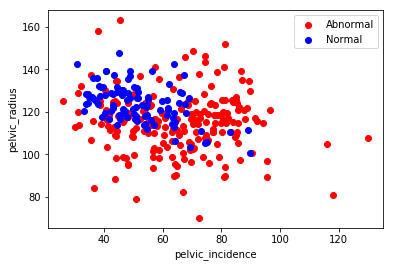

In [4]:
#summary info about data
A = data[data["class"] == "Abnormal"]
N = data[data["class"] == "Normal"]
plt.scatter(A.pelvic_incidence, A.pelvic_radius, color="red", label = "Abnormal")
plt.scatter(N.pelvic_incidence, N.pelvic_radius, color="blue", label = "Normal")
plt.legend()
plt.xlabel("pelvic_incidence")
plt.ylabel("pelvic_radius")
plt.show()

In [5]:
# data variables and normalization
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
y = data["class"].values
x_temp = data.drop(["class"], axis=1)
x = (x_temp- np.min(x_temp)) / (np.max(x_temp)-np.min(x_temp)).values

In [6]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [7]:
# %%
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(13,knn.score(x_test,y_test)))

 13 nn score: 0.7849462365591398 


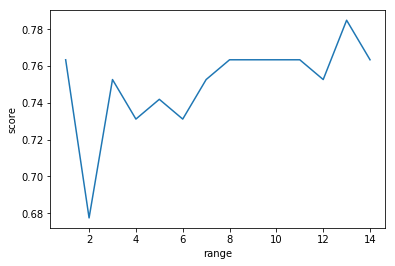

In [8]:
#k value test
score_list = []
liste = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for each in range(1,15):
    neigh_test = KNeighborsClassifier(n_neighbors=each)
    neigh_test.fit(x_train,y_train)
    score_list.append(neigh_test.score(x_test,y_test))
plt.plot(range(1,15), score_list)
plt.xlabel("range")
plt.ylabel("score")
plt.show()
   